# Predicting Total Interactions of Facebook page
## Phase 2: Statistical Modelling

#### Group Number: 
45
#### Names & Student IDs of Group Members:
Athul Varghese Thampan, S3958556

Mohamed Bilal Naeem, S3967700


## Table of Contents
* [Introduction](#intro)
  + [Phase 1 Summary](#Phase-1-Summary)
  + [Report Overview](#Report-Overview)
  + [Overview of Methodology](#Overview-of-Methodology)
* [Statistical Modelling](#sm)
  + [Full Model Overview](#Full-Model-Overview)
  + [Model Fitting](#Model-Fitting)
* [Critique & Limitations](#cl)
* [Summary & Conclusions](#sc)
  + [Project Summary](#Project-Summary)
  + [Summary of Findings](#Summary-of-Findings)
  + [Conclusions](#Conclusions)

## Introduction <a id='intro'></a>

### Phase 1 Summary

This report continues on the Phase 1 report. For the Phase 1 report, we cleaned and preprocessed the Facebook metrics dataset. During this process, we decided to remove data that we decided was unnecessary for statistical analysis and modelling. The data that was dropped was the `category` column since it was redundant, and we also dropped any missing values in the dataset. The dataset contained 500 observations in total out of which 5 were dropped due to missing values. After the data preprocessing, the dataset contains 18 variables and 495 observations. We also changed the `paid` column to have values that were `strings` since it is a binary categorical variable, and for the ease of handling the data. We also represented the data using a variety of graphs so as to visualise the data. 

We will be using the same Facebook metrics dataset for the Phase 2 report in order to conduct statistical modelling. But the dataset that we are using will be the cleaned and preprocessed dataset, which was the result of Phase 1 report and it was saved as a separate preprocessed dataset.


### Report Overview

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

### Overview of Methodology

A detailed, complete, and accurate overview of your statistical modelling methodology (which is multiple linear regression). More specifically, in this subsection, you will provide a summary of your "Statistical Modelling" section below.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

Firstly, we will read the preprocessed Facebook metrics dataset and import the required modules.

#### Module Imports

In [1]:
#importing all the required modules and reading the csv file.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group45.csv')

Now let's view the first 10 rows of this dataset.

In [2]:
#printing first 10 rows
df.head(10)

,page_total_likes,type,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,Photo,12,4,3,No,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,12,3,10,No,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,12,3,3,No,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,12,2,10,Yes,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,12,2,3,No,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,12,1,9,No,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,12,1,3,Yes,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,12,7,9,Yes,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,12,7,3,No,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,12,6,10,No,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Since the dataset was already preprocessed during Phase 1, we will not be preprocessing it again.

#### Variables

There are 18 variables in this dataset, and they are as follows:
- page_total_likes
- type
- post_month
- post_weekday
- post_hour
- paid
- lifetime_post_total_reach
- lifetime_post_total_impressions
- lifetime_engaged_users
- lifetime_post_consumers
- lifetime_post_consumptions
- lifetime_post_impressions_by_people_who_have_liked_your_page
- lifetime_post_reach_by_people_who_like_your_page
- lifetime_people_who_have_liked_your_page_and_engaged_with_your_post
- comment
- like
- share
- total_interactions

Our target variable is `total_interactions` and the remaining variables are our independent variables.

### Model Fitting

### Regression Formula

We now construct the regression formula and add all the independent variables using some string functions.

(We will be dropping the `like` and `share` variables for this model since it seems to cause the R-squared and Adj. R-squared values to be equal to 1. We disregard these variables, so that we can more meaningful plots for our model.)

In [3]:
#regression formula as a string
formula_string_indep_vars = ' + '.join(df.drop(['total_interactions','like','share'],axis=1).columns)
formula_string = 'total_interactions ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  total_interactions ~ page_total_likes + type + post_month + post_weekday + post_hour + paid + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment


Next, we can one-hot-encode the categorical features in the dataset using `get_dummies()` function in `Pandas`. Here, the categorical features are: `type` and `paid`. Let's print the first 10 rows after one-hot-encoding.

In [4]:
#one-hot-encoding the categorical features and printing first 10 rows
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head(10)

,page_total_likes,post_month,post_weekday,post_hour,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions,type_Photo,type_Status,type_Video,paid_Yes
0,139441,12,4,3,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,1,0,0,0
1,139441,12,3,10,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,0,1,0,0
2,139441,12,3,3,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,1,0,0,0
3,139441,12,2,10,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,1,0,0,1
4,139441,12,2,3,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,1,0,0,0
5,139441,12,1,9,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186,0,1,0,0
6,139441,12,1,3,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279,1,0,0,1
7,139441,12,7,9,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339,1,0,0,1
8,139441,12,7,3,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192,0,1,0,0
9,139441,12,6,10,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142,1,0,0,0


We can now create a new formula string using the one-hot-encoded features.

In [5]:
#new formula string
formula_string_indep_vars_encoded = ' + '.join(df_encoded.drop(['total_interactions','like','share'],axis=1).columns)
formula_string_encoded = 'total_interactions ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  total_interactions ~ page_total_likes + post_month + post_weekday + post_hour + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment + type_Photo + type_Status + type_Video + paid_Yes


Now, we add two interaction terms to our full model. Let it be the interaction of the `comment` feature with `lifetime_post_total_reach` and
`lifetime_post_total_impressions` respectively.

In [6]:
formula_string_encoded = formula_string_encoded + ' + lifetime_post_total_reach:comment + lifetime_post_total_impressions:comment'

Next, we can add the square of the `comment` feature to illustrate higher order terms in our linear regression.

In [7]:
formula_string_encoded = formula_string_encoded + ' + np.power(comment, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  total_interactions ~ page_total_likes + post_month + post_weekday + post_hour + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment + type_Photo + type_Status + type_Video + paid_Yes + lifetime_post_total_reach:comment + lifetime_post_total_impressions:comment + np.power(comment, 2)


Now, let us view the OLS regression results.

In [8]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
model_full_fitted = model_full.fit()

print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     total_interactions   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1517.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:24:21   Log-Likelihood:                -2611.2
No. Observations:                 495   AIC:                             5264.
Df Residuals:                     474   BIC:                             5353.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

The full model has an adjusted R-squared value of 0.984, which means that about 98% of the variance is explained by the model. Looking at our p-values, we observe that the majority of them are highly significant.

Now, we define a new data frame for actual total interactions vs. predicted total interactions and the
residuals for the full model. We will use this to plot predicted values and the regression residuals.

In [9]:
residuals_full = pd.DataFrame({'actual': df_encoded['total_interactions'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,100,100.603715,-0.603715
1,164,161.098378,2.901622
2,80,81.008855,-1.008855
3,1777,1903.183699,-126.183699
4,393,395.059153,-2.059153
5,186,165.295341,20.704659
6,279,269.879831,9.120169
7,339,360.786790,-21.786790
8,192,192.857715,-0.857715
9,142,125.293506,16.706494


We now plot actual total interactions vs. predicted total interactions.

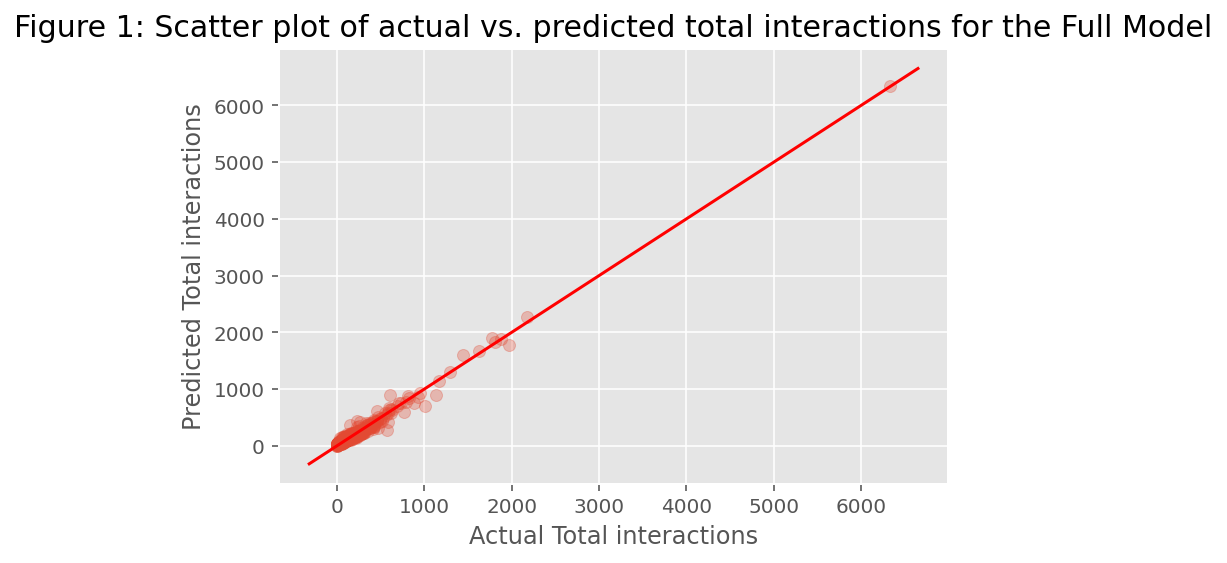

In [10]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Total interactions');
plt.ylabel('Predicted Total interactions');
plt.title('Figure 1: Scatter plot of actual vs. predicted total interactions for the Full Model', fontsize=15);
plt.show();

From Figure 1, we can see that most of the residuals are very close to the line of best fit. There is only 1 prediction that is higher than 3000, the rest are below 3000.

We can now proceed to full model diagnostic checks.

### Full Model Diagnostic Checks

We now check whether there are indications of violations of the regression assumptions, which are

1. Linearity: The relationship between the explanatory and the response variable should be linear.
2. Nearly normal residuals: Histogram of the residuals should be bell-shaped centred at zero.
3. Constant variability: The variability of points around the least squares line should be roughly constant.
4. Independence of observations: each row in the underlying dataset should be independent of each other.

Let's first get a scatter plot of the residuals.

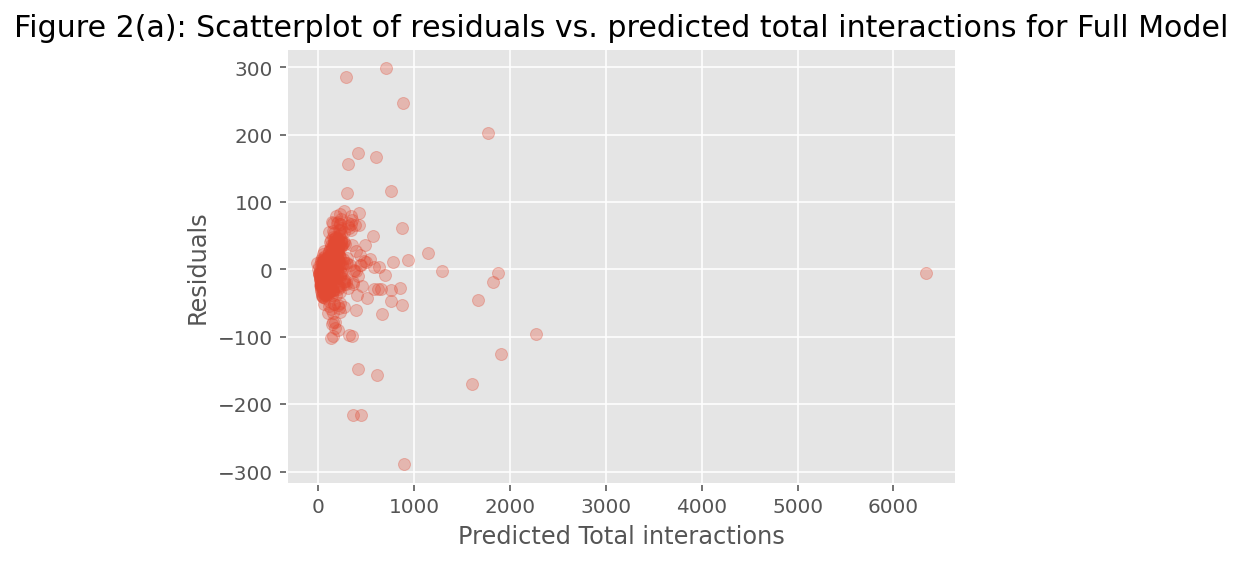

In [11]:
#scatterplot of residuals vs. predicted total interactions
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Total interactions');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted total interactions for Full Model', fontsize=15)
plt.show();

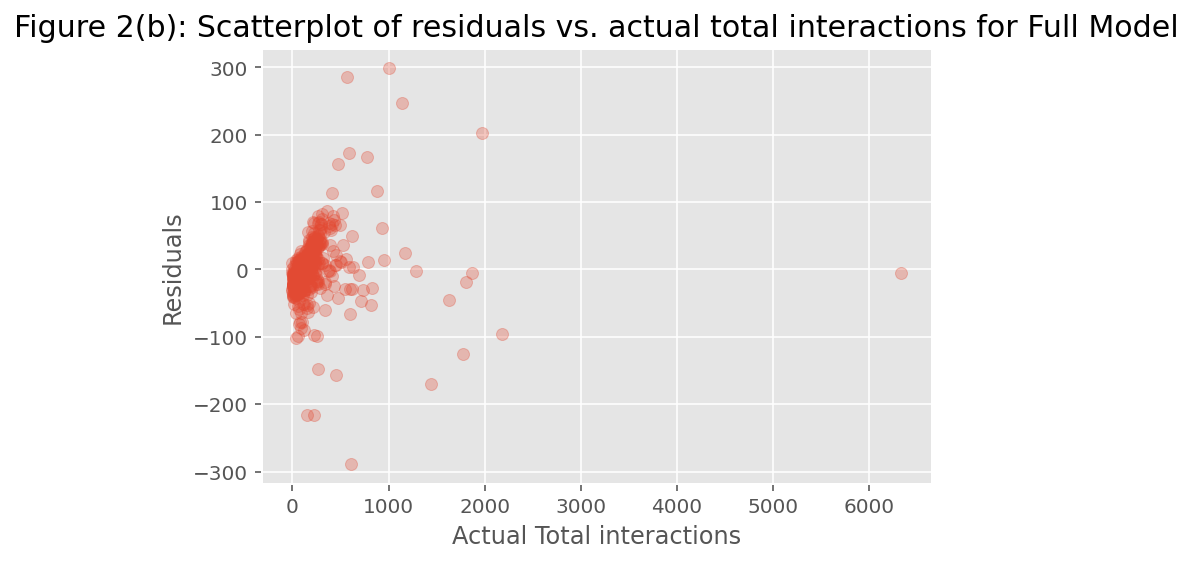

In [12]:
#scatterplot of residuals vs. actual total interactions
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Total interactions');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual total interactions for Full Model', fontsize=15)
plt.show();

From Figure 2(a) and Figure 2(b), we can see that they are both more or less very similar. We can also see that the residuals are mostly random and centred around 0. This pattern indicates that the constant variability assumption of linear regression is mostly satisfied in this case.

Now, let's check the histograms of actual vs. predicted age on the same plot.

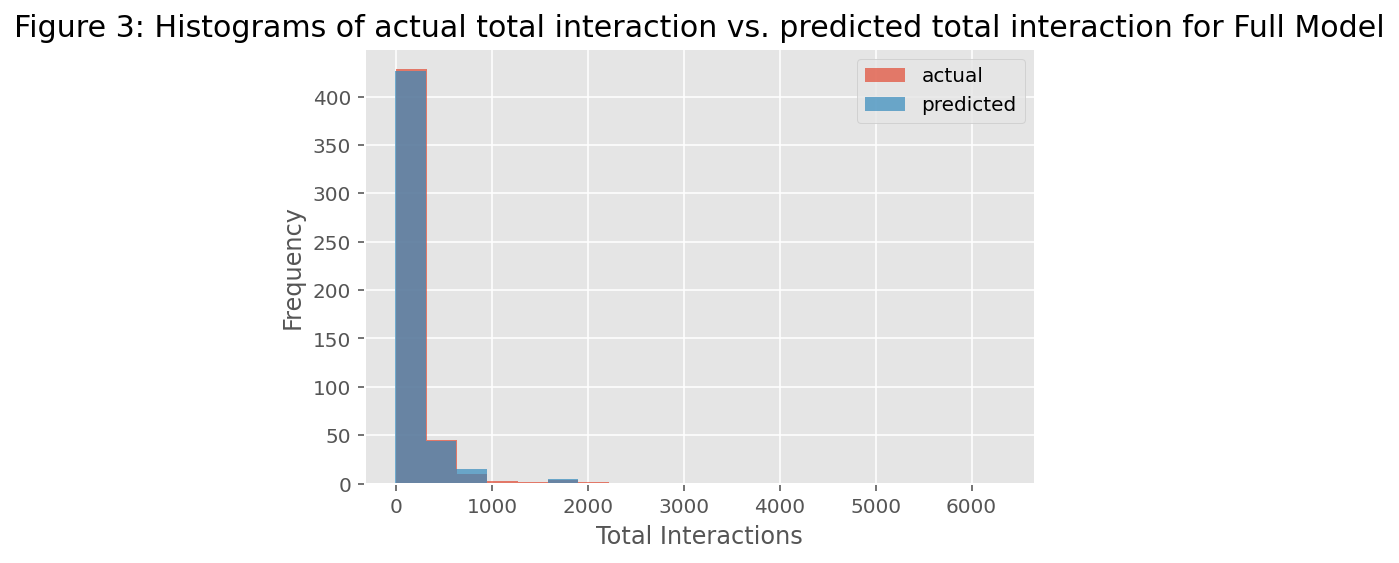

In [13]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Total Interactions');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual total interaction vs. predicted total interaction for Full Model', fontsize=15);
plt.legend()
plt.show();

We can notice that their distributions are extremely similar. It seems to be right-skewed and unimodal.

Next, we can look at the histogram of the residuals.

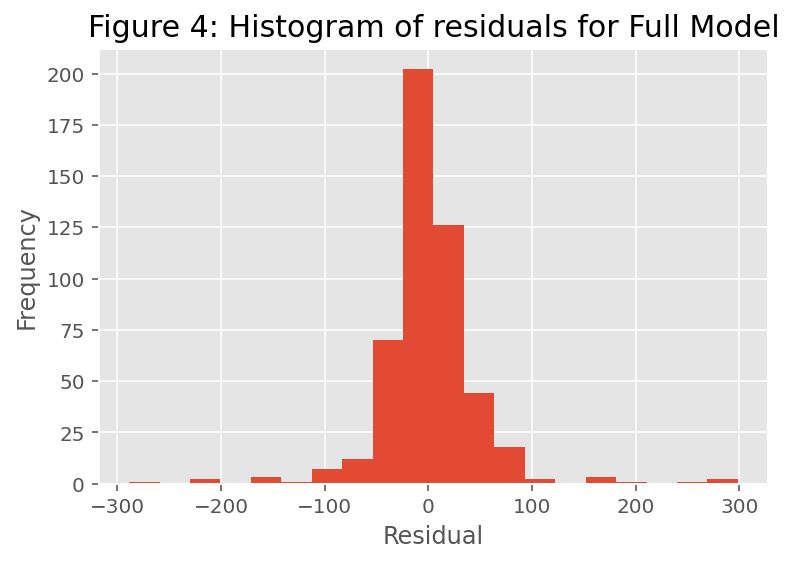

In [14]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 4, we can see that the distribution is mostly symmetric and unimodal. Hence, it seems that the normality assumption is not notably violated.

### Backwards Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb)).

In [ ]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")

### Reduced Model Overview

Overview of your reduced model, including the variables and terms you are using in your model.

### Reduced Model Diagnostic Checks

You need to check whether there are indications of violations of the regression assumptions for the reduced model.

## Critique & Limitations <a id='cl'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

### Summary of Findings

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

### Conclusions

Your detailed conclusions as they relate to your goals and objectives.